example for how to use double ended connect to connect the minima in an existing database

we will use as an example system the Lennard-Jones cluster with a small number of atoms.
Since we don't already have a database, for this example we'll build a small one using
basinhopping

In [26]:
ls

disconnectivity_graph_example.ipynb          molecular_cluster.py
disconnectivity_graph_import_clusters.ipynb  molecular_cluster.pyc
disconnectivity_graph_water.ipynb            TIP4P-2.xyz
make_disconnectivity_graph.py                water_cluster.py


In [13]:
# import cluster from xyz file
# construct water cluster database, 

from pele import storage 
from molecular_cluster import MolecularCluster, Molecule

class WaterCluster(MolecularCluster):
    def define_molecule(self):
        # define atom types, internal permutations, bonds
        types=["O","H","H"]
        permlist=[[1,2]]
        bonds=[[0,1],[0,2]]
        return Molecule(types,permlist,bonds)

nmol = 5
system = WaterCluster(nmol)
print system.get_masses()
print system.get_permlist()


will compute the lowest eigenvector by diagonalizing the Hessian
[15.9994, 1.00794, 1.00794, 15.9994, 1.00794, 1.00794, 15.9994, 1.00794, 1.00794, 15.9994, 1.00794, 1.00794, 15.9994, 1.00794, 1.00794]
[[[0, 3, 6, 9, 12], [1, 4, 7, 10, 13], [2, 5, 8, 11, 14]], [1, 2], [4, 5], [7, 8], [10, 11], [13, 14]]


create the database where the minima and transition states will be stored

In [43]:
from pele.utils.xyz import read_xyz
db = system.create_database()
fin = open("TIP4P2.xyz", 'r')
tip4p2 = read_xyz(fin)
energy = float(tip4p2.title.split()[-2])
tip4p2.coords

array([[-0.185814 , -1.1749469,  0.7662596],
       [-0.1285513, -0.8984365,  1.6808606],
       [-0.0582782, -0.370255 ,  0.2638279],
       [ 0.1747051,  1.1050002, -0.724443 ],
       [-0.5650842,  1.3134964, -1.2949455],
       [ 0.9282185,  1.065299 , -1.3134026]])

In [44]:
db.addMinimum(energy, tip4p2.coords)

In [45]:
print "number of minima", db.number_of_minima()
print "number of transition states", db.number_of_transition_states()

number of minima 1
number of transition states 0


use basinhopping to build a database of minima

In [46]:
??system.get_basinhopping

In [47]:
bh = system.get_basinhopping(database=db, outstream=None)
bh.run(100)

use the logging module to turn of status printing for the connect runs

In [48]:
import logging
logger = logging.getLogger("pele.connect")
logger.setLevel("WARNING")

do a bunch of double ended connect runs to find transition states connecting the minima

In [17]:
from pele.landscape import ConnectManager
manager = ConnectManager(db)
for i in xrange(20):
    min1, min2 = manager.get_connect_job()
    connect = system.get_double_ended_connect(min1, min2, db, verbosity=-1)
    connect.connect()

sending a random connect job 7 5
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
energy decreased after uphill step -757.946691195 -> -757

will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
energy decreased after uphill step -757.782981155 -> -757.798896909
  positive before check. setting all ok
energy decreased after uphill step -757.820555704 -> -758.20366738
energy decreased after uphill step -757.793514827 -> -757.927442623
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
wi

will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
energy decreased after uphill step -757.790886969 -> -758.486729007
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will co

  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
energy decreased after uphill step -699.437954489 -> -699.9075595
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will

will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
energy decreased after uphill step -757.806983106 -> -758.53949275
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
sending a random connect job 165 37
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector b

will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
energy decreased after uphill step -757.774014474 -> -757.786768212
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
sending a random connect job 345 366
will compute the lowest eigenvector

will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
energy decreased after uphill step -757.805005875 -> -758.282475285
will compute the lowest eigenvector by diagonalizing the Hessian
will compute the lowest eigenvector by diagonalizing the Hessian
  positive before check. setting all ok
  positive before check. setting all ok
  positive before check. setting all ok
  posit

now that we have a database with minima and transition states we can build the disconnectivity graph

print some information about the database

In [49]:
print "number of minima", db.number_of_minima()
print "number of transition states", db.number_of_transition_states()

number of minima 19
number of transition states 0


In [50]:
from pele.utils.disconnectivity_graph import DisconnectivityGraph, database2graph

graph = database2graph(db)
dgraph = DisconnectivityGraph(graph)
dgraph.calculate()
dgraph.plot()
import matplotlib.pyplot as plt
# plt.figure(figsize=(30,1))
plt.show()

AssertionError: graph has no transition states

dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7fdd38024b90>


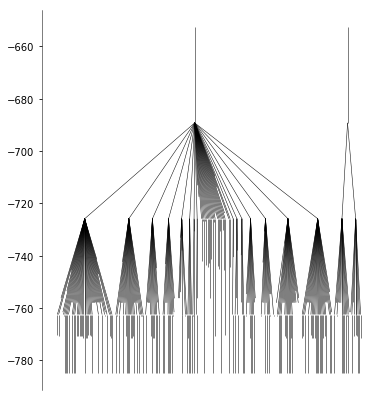

dgraph: too few nodes connected to <pele.storage.database.Minimum object at 0x7fdd38024b90>


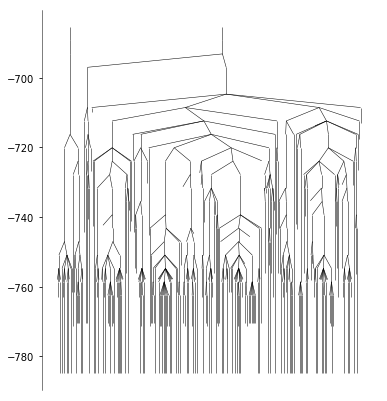

In [40]:
dgraph3 = DisconnectivityGraph(graph, order_by_energy = True)
dgraph3.calculate()
dgraph3.plot()
import matplotlib.pyplot as plt
# plt.figure(figsize=(30,1))
plt.show()